## Problem1

The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

In [1]:
import pandas as pd
airline = pd.read_excel("Airlines Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [2]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [3]:
airline.shape

(96, 2)

In [27]:
# Pre processing
import numpy as np

airline["t"] = np.arange(1,97)

airline["t_square"] = airline["t"] * airline["t"]
airline["log_passengers"] = np.log(airline["Passengers"])
airline.columns

Index(['Month', 'Passengers', 't', 't_square', 'log_passengers'], dtype='object')

In [5]:
airline['months']= 0

for i in range(96):
    p = pd.to_datetime(airline['Month']).dt.month[i]
    airline['months'][i]= p
    
month_dummies = pd.DataFrame(pd.get_dummies(airline['months']))
airline1 = pd.concat([airline, month_dummies], axis = 1)

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_9392/3871241413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['months'][i]= p
C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_9392/3871241413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['months'][i]= p
C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_9392/3871241413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline['months'][i]= p
C:\Users\A

<AxesSubplot:>

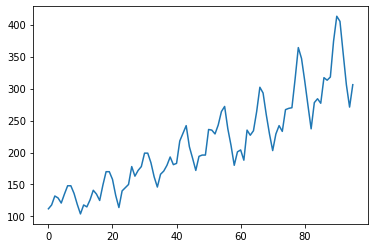

In [29]:
# Visualization - Time plot
airline1.Passengers.plot()



In [6]:
airline1.shape


(96, 15)

In [7]:
airline1.head(20)

,Month,Passengers,months,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,0,0,0,0,1,0,0,0,0,0,0,0
5,1995-06-01,135,6,0,0,0,0,0,1,0,0,0,0,0,0
6,1995-07-01,148,7,0,0,0,0,0,0,1,0,0,0,0,0
7,1995-08-01,148,8,0,0,0,0,0,0,0,1,0,0,0,0
8,1995-09-01,136,9,0,0,0,0,0,0,0,0,1,0,0,0
9,1995-10-01,119,10,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
airline1.rename(columns = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace = True)
airline1.head()

,Month,Passengers,t,t_square,log_passengers,months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,5,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
# Data Partition
Train = airline1.head(90)
Test = airline1.tail(6)



In [48]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers ~ t', data = Train).fit()

linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     402.8
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.34e-34
Time:                        16:52:31   Log-Likelihood:                -424.60
No. Observations:                  90   AIC:                             853.2
Df Residuals:                      88   BIC:                             858.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.6370      5.822     17.801      0.000      92.067     115.207
t              2.2302      0.111     20.071      0.000       2.009       2.451
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.965
Skew:                           0.378   Prob(JB):                        0.227
Kurtosis:                       3.467   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_linear))**2))
rmse_linear

64.13398871447575

In [50]:
##################### Exponential ##############################

Exp = smf.ols('log_passengers ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp



59.491553698574016

In [51]:
#################### Quadratic ###############################

Quad = smf.ols('Passengers ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_Quad))**2))
rmse_Quad



59.73611401562192

In [54]:
################### Additive seasonality ########################

add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+ Dec', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea



139.25284105359074

In [55]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea



147.13846261400556

In [56]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Passengers ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 



29.678976914609407

In [58]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse



,MODEL,RMSE_Values
0,rmse_linear,64.133989
1,rmse_Exp,59.491554
2,rmse_Quad,59.736114
3,rmse_add_sea,139.252841
4,rmse_add_sea_quad,29.678977
5,rmse_Mult_sea,147.138463
6,rmse_Mult_add_sea,10.279943


'rmse_add_sea_quad' has the least value among the models prepared so far Predicting new values 
